In [1]:
# prerequisites
import csv
import pandas as pd

import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [4]:

def loadData(fileName, inputVariabName1, inputVariabName2, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabName1)
    inputs1 = [float(data[i][selectedVariable1]) if data[i][selectedVariable1] != '' else None for i in range(len(data))]
    selectedVariable2 = dataNames.index(inputVariabName2)
    inputs2 = [float(data[i][selectedVariable2]) if data[i][selectedVariable2] != '' else None for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) if data[i][selectedOutput] != '' else None for i in range(len(data))]

    df = pd.DataFrame({
        inputVariabName1: inputs1,
        inputVariabName2: inputs2,
        outputVariabName: outputs
    })

    df.dropna(inplace=True)
    inputs1 = df[inputVariabName1].tolist()
    inputs2 = df[inputVariabName2].tolist()
    outputs = df[outputVariabName].tolist()

    return inputs1, inputs2, outputs


crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

inputs1, inputs2, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Freedom','Happiness.Score')
print('in1:  ', inputs1[:5])
print('in2:  ', inputs2[:5])
print('out: ', outputs[:5])

in1:   [1.616463184, 1.482383013, 1.48063302, 1.564979553, 1.443571925]
in2:   [0.635422587, 0.626006722, 0.627162635, 0.620070577, 0.617950857]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


In [3]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

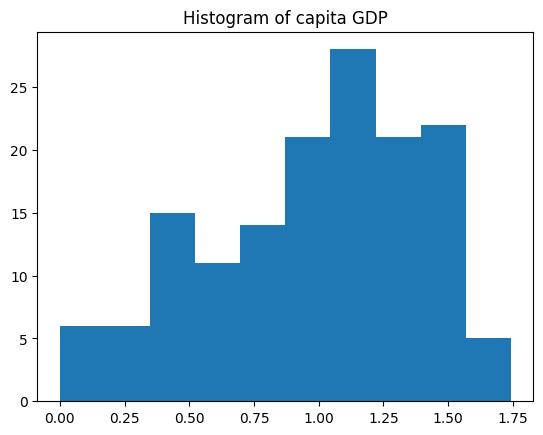

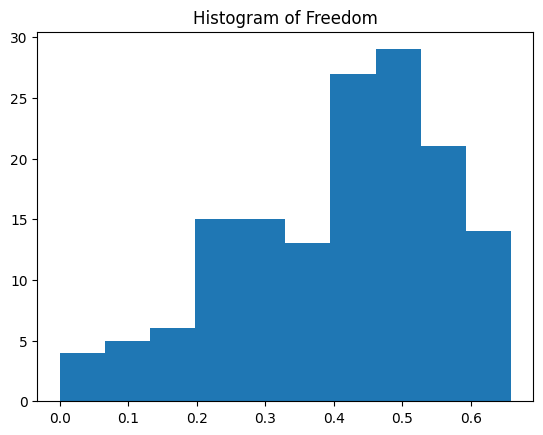

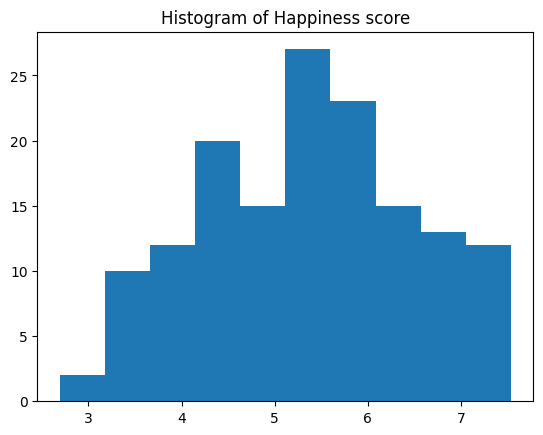

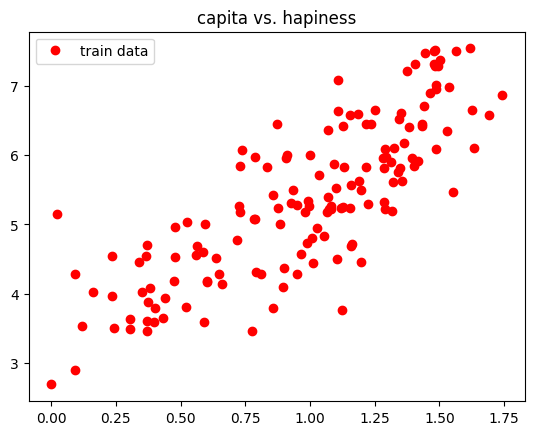

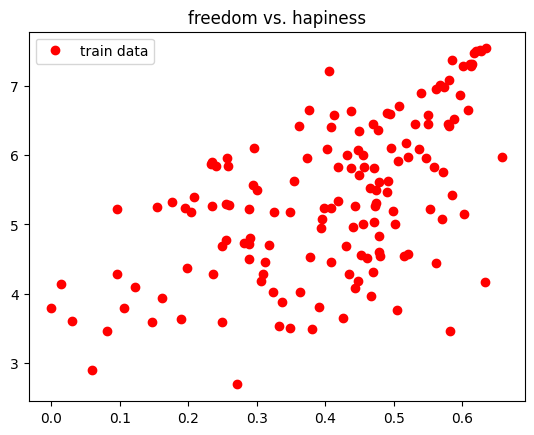

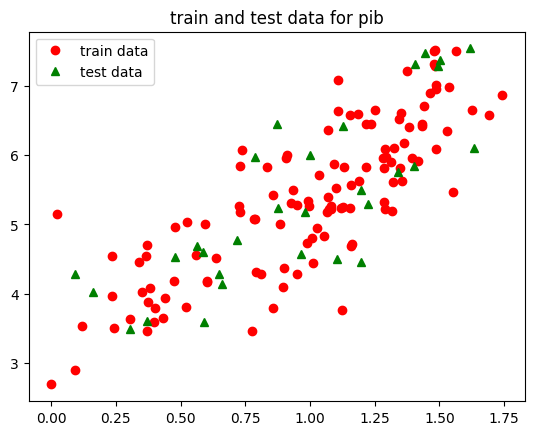

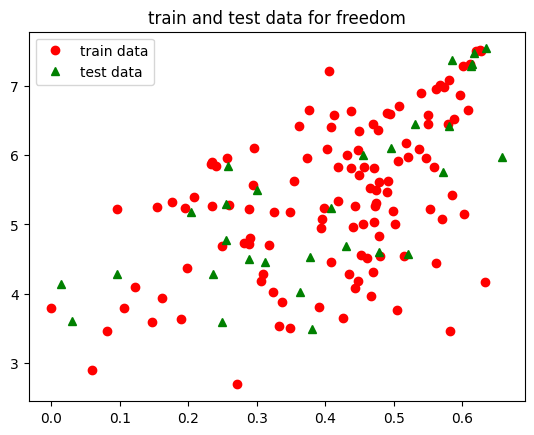

the learnt model: f(x) =  2.546696109833419  +  1.9208590344194252  * x1 +  2.24055150677719  * x2


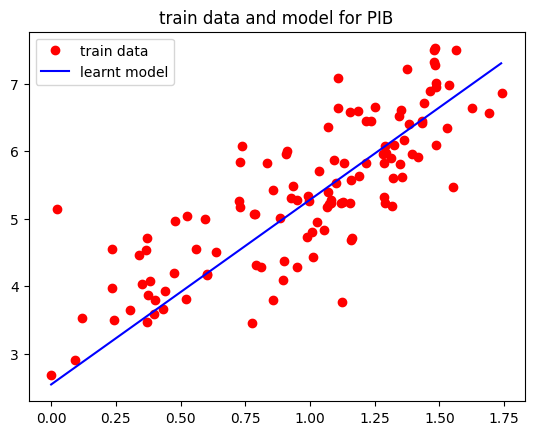

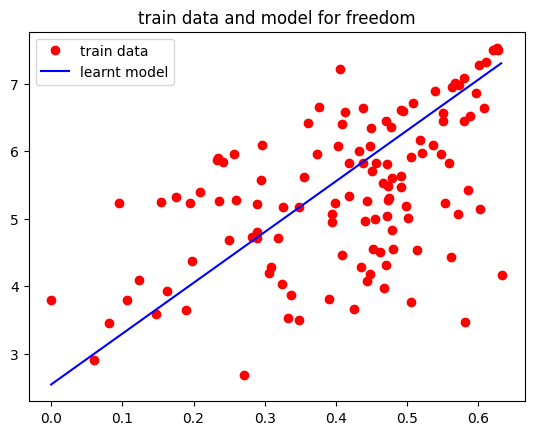

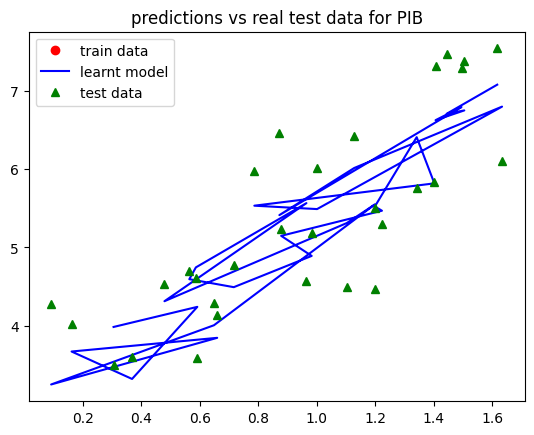

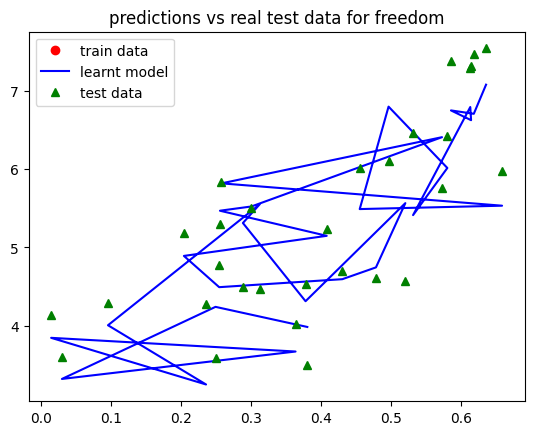

prediction error (manual):  0.3239053614564407
prediction error (tool):  0.32390536145644067


In [7]:
def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

inputsPIB,inputsFree, outputs = loadData(filePath, 'Economy..GDP.per.Capita.','Freedom', 'Happiness.Score')

plotDataHistogram(inputsPIB, 'capita GDP')
plotDataHistogram(inputsFree, 'Freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
plotData(inputsPIB, outputs, [], [], [], [], 'capita vs. hapiness')
plotData(inputsFree, outputs, [], [], [], [], 'freedom vs. hapiness')


# split data into training data (80%) and testing data (20%)
np.random.seed(5)
indexes = [i for i in range(len(inputsPIB))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputsPIB)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputsPIB = [inputsPIB[i] for i in trainSample]
trainInputsFree = [inputsFree[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputsPIB = [inputsPIB[i] for i in validationSample]
validationInputsFree = [inputsFree[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]


plotData(trainInputsPIB, trainOutputs, [], [], validationInputsPIB, validationOutputs, "train and test data for pib")
plotData(trainInputsFree, trainOutputs, [], [], validationInputsFree, validationOutputs, "train and test data for freedom")


# training step
xx = [[el1,el2] for el1,el2 in zip(trainInputsPIB,trainInputsFree)]

regressor = linear_model.LinearRegression()
#regressor = linear_model.SGDRegressor(max_iter =  10000)
regressor.fit(xx, trainOutputs)
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2')

# plot the model
noOfPoints = 1000

xrefPIB = []
xrefFree = []

val = min(trainInputsPIB)
step = (max(trainInputsPIB) - min(trainInputsPIB)) / noOfPoints
for i in range(1, noOfPoints):
    xrefPIB.append(val)
    val += step

val = min(trainInputsFree)
step = (max(trainInputsFree) - min(trainInputsFree)) / noOfPoints
for i in range(1, noOfPoints):
    xrefFree.append(val)
    val += step

yref = [w0 + w1 * el1 + w2*el2 for el1,el2 in zip(xrefPIB,xrefFree)]

plotData(trainInputsPIB, trainOutputs, xrefPIB, yref, [], [], title = "train data and model for PIB")
plotData(trainInputsFree, trainOutputs, xrefFree, yref, [], [], title = "train data and model for freedom")



#makes predictions for test data
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
#makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict([[x1,x2] for x1,x2 in zip(validationInputsPIB,validationInputsFree)])
plotData([], [], validationInputsPIB, computedValidationOutputs, validationInputsPIB, validationOutputs, "predictions vs real test data for PIB")

plotData([], [], validationInputsFree, computedValidationOutputs, validationInputsFree, validationOutputs, "predictions vs real test data for freedom")

#compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("prediction error (manual): ", error)

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("prediction error (tool): ", error)